In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [2]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)

In [3]:
features

array([[ 8.41540974e-02,  1.13341197e-01],
       [ 1.05091536e+00,  1.54710235e-01],
       [-7.16555269e-01,  6.75607887e-01],
       [ 6.09316755e-02,  9.26542340e-01],
       [-1.00552480e+00,  3.36425155e-01],
       [ 7.63045744e-01, -4.82519400e-01],
       [ 1.30067681e+00, -4.60456076e-01],
       [ 8.93997023e-01, -5.39443631e-01],
       [ 1.01492378e+00,  2.49633435e-01],
       [-8.88621081e-01,  5.38566586e-01],
       [ 1.36613788e+00, -3.56819676e-01],
       [ 1.69872955e+00, -2.50238607e-01],
       [ 1.93909982e+00,  7.98335031e-02],
       [ 1.98164910e+00,  2.73166182e-01],
       [-1.92842298e-01,  9.90722796e-01],
       [ 1.87318667e+00, -1.28604429e-01],
       [ 1.12842503e+00, -4.29068613e-01],
       [ 9.60365014e-01,  5.24004362e-01],
       [ 6.83418960e-01, -4.32057757e-01],
       [ 8.36557987e-01,  5.74232279e-01],
       [ 2.04424212e+00,  4.47864563e-01],
       [ 7.89541222e-01,  4.20628768e-01],
       [-8.99855447e-01,  3.09253977e-01],
       [-1.

In [4]:
true_labels

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0])

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaled_features = scaler.fit_transform(features)

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=2)

In [10]:
kmeans.fit(scaled_features)

KMeans(n_clusters=2)

In [11]:
labels = kmeans.labels_

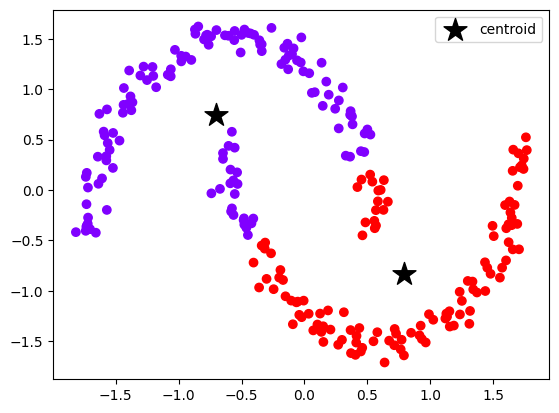

In [13]:
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, color='black', marker='*', label='centroid')
plt.legend()
plt.show()

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan = DBSCAN(eps=0.3)

In [16]:
dbscan.fit(scaled_features)

DBSCAN(eps=0.3)

In [17]:
labels1 = dbscan.labels_

<ipython-input-19-530f70c28916>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


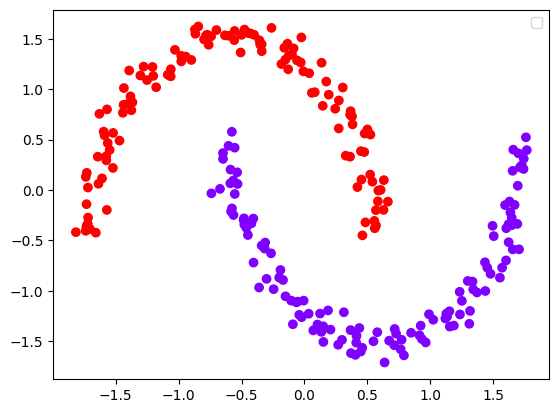

In [19]:
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=labels1, cmap='rainbow')
plt.legend()
plt.show()

In [20]:
# compute the silhoutte scores for each algorithm

from sklearn.metrics import silhouette_score

In [22]:
kmeans_silhouette = silhouette_score(scaled_features, labels).round(2)

In [23]:
kmeans_silhouette

0.5

In [24]:
dbscan_silhouette = silhouette_score(scaled_features, labels1).round(2)

In [25]:
dbscan_silhouette

0.38

In [26]:
# A higher silhouette coefficient suggests better clusters.
# Here the silihouette coefficient is higher for k-means algorithm.

In [27]:
kmean_inertia = kmeans.inertia_

In [28]:
kmean_inertia

207.85054603400195

In [30]:
# inertia value is 207 which suggest that the data points are somewhat close to there cluster center, but there meight be some variation.
# Silihouette score is a measure of how similar an object is to its own cluster(cohesion) compared to other clusters(seperation)
# Silihouette score ranges from -1 to 1.
# 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
# -1 indicates that the object has been assigned to the wrong cluster.
# 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.

In [31]:
# Here silihouette score for kmean is 0.5 that indicates that the data points are somewhat clustered, but there is still some ambiguity.
# this might indicate that:
# 1. some data points are close to the decision boundary between clusters.
# 2. There might be some overlap between clusters.
# 3. The clustering algorithm might not have captured the underlying structure of the data perfectly.